In [34]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [109]:
# Bi-variate data
xdata = [0.5, 1.2, 2.7, 3.6]
ydata = [1, 2.8, 4, 4.1]

xdata = np.random.rand(100)
ydata = []
for xVal in xdata:
    ydata.append(xVal + 0.5*np.random.rand())
    
#print(f'xdata = {xdata}')
#print(f'ydata = {ydata}')


xmean = np.mean(xdata)
ymean = np.mean(ydata)

In [110]:
# Covariance
np.cov(xdata, ydata)

array([[0.0887033 , 0.08769547],
       [0.08769547, 0.10642054]])

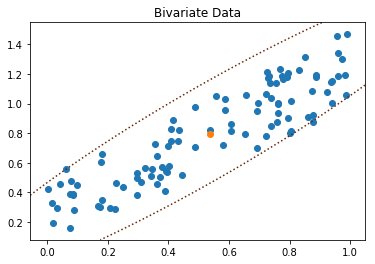

In [114]:
fig,ax = plt.subplots()
#fig, ax = plt.subplot(3)
test = ax.scatter(xdata, ydata)
test = ax.scatter(xmean, ymean)

X = np.column_stack((xdata, ydata))
#print(X)
robust_cov = MinCovDet().fit(X)
#print(robust_cov)

robust_cov.location_

xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))

#print(f'xx = {xx}')

zz = np.c_[xx.ravel(), yy.ravel()]

#print(f'zz = {zz}')

# Calculates the squared Mahalonabis distances from a set of observations
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)

#print(f'mahal = {mahal_robust_cov}')

# We want to show a contour at the specific distance of 0.90
robust_contour = ax.contour(xx, yy, np.sqrt(mahal_robust_cov), [2.999],
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

plt.title('Bivariate Data')
plt.show()